<a href="https://colab.research.google.com/github/OscarRojasG/ADA-Informes/blob/main/Informe11-BellmanFord.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Problema del camino más corto 

**Entrada**: Un grafo dirigido $G=(V,E)$, un vértice fuente $s\in V$, y un valor real $l_e$ asociado a cada arco $e\in E$.

**Salida**: La distancia más corta $\text{dist}(s,v)$ para cada vértice $v\in V$, o una declaración indicando que $G$ contiene un ciclo negativo.

El problema del camino más corto consiste en encontrar la distancia mínima que existe entre un vértice $s$ y todos los nodos de un grafo $G$. Cada arco o conexión del grafo tiene asociado un peso o distancia, por lo tanto, la distancia entre un vértice y otro se calculará como la suma de los arcos que hay entre ellos.

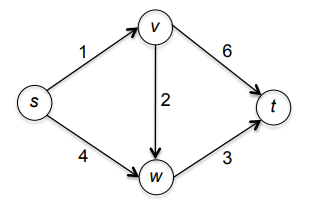

# 2. Algoritmo de Bellman-Ford y Dijkstra

## 2.1 Código

### Funciones auxiliares

In [109]:
import matplotlib.pyplot as plt
import numpy as np

def draw_edge_labels(G, pos, edge_labels=None, label_pos=0.5, 
                     font_size=10, font_color="k", font_family="sans-serif", 
                     font_weight="normal", alpha=None, bbox=None,
                     horizontalalignment="center", verticalalignment="center",
                     ax=None, rotate=True, clip_on=True, rad=0):
  if ax is None:
    ax = plt.gca()
  if edge_labels is None:
    labels = {(u, v): d for u, v, d in G.edges(data=True)}
  else:
    labels = edge_labels

  text_items = {}
  for (n1, n2), label in labels.items():
    (x1, y1) = pos[n1]
    (x2, y2) = pos[n2]
    (x, y) = (
        x1 * label_pos + x2 * (1.0 - label_pos),
        y1 * label_pos + y2 * (1.0 - label_pos),
    )
    pos_1 = ax.transData.transform(np.array(pos[n1]))
    pos_2 = ax.transData.transform(np.array(pos[n2]))
    linear_mid = 0.5*pos_1 + 0.5*pos_2
    d_pos = pos_2 - pos_1
    rotation_matrix = np.array([(0,1), (-1,0)])
    ctrl_1 = linear_mid + rad*rotation_matrix@d_pos
    ctrl_mid_1 = 0.5*pos_1 + 0.5*ctrl_1
    ctrl_mid_2 = 0.5*pos_2 + 0.5*ctrl_1
    bezier_mid = 0.5*ctrl_mid_1 + 0.5*ctrl_mid_2
    (x, y) = ax.transData.inverted().transform(bezier_mid)

    if rotate:
      angle = np.arctan2(y2 - y1, x2 - x1) / (2.0 * np.pi) * 360
      if angle > 90:
        angle -= 180
      if angle < -90:
        angle += 180
      xy = np.array((x, y))
      trans_angle = ax.transData.transform_angles(
          np.array((angle,)), xy.reshape((1, 2))
      )[0]
    else:
      trans_angle = 0.0

      if bbox is None:
          bbox = dict(boxstyle="round", ec=(1.0, 1.0, 1.0), fc=(1.0, 1.0, 1.0))
      if not isinstance(label, str):
          label = str(label)

    ax.text(x, y, label, size=font_size, color=font_color, 
            family=font_family, weight=font_weight, alpha=alpha,
            horizontalalignment=horizontalalignment, 
            verticalalignment=verticalalignment,
            rotation=trans_angle, transform=ax.transData, bbox=bbox,
            zorder=1, clip_on=clip_on)

  ax.tick_params(
      axis="both",
      which="both",
      bottom=False,
      left=False,
      labelbottom=False,
      labelleft=False,
  )

In [110]:
import matplotlib.pyplot as plt
import networkx as nx

def draw_graph(G):
  pos = nx.spring_layout(G, k=2.25, seed=1)
  nx.draw(G, pos, node_size=1000, node_color='white', edgecolors='black', edgelist=[])
  nx.draw_networkx_labels(G, pos, font_size=12)

  curved_edges = [edge for edge in G.edges() if reversed(edge) in G.edges()]
  straight_edges = list(set(G.edges()) - set(curved_edges))

  nx.draw_networkx_edges(G, pos, edgelist=straight_edges, node_size=1000)
  nx.draw_networkx_edges(G, pos, edgelist=curved_edges, node_size=1000,
                        connectionstyle=f'arc3, rad=0.25')

  edge_weights = nx.get_edge_attributes(G, 'weight')
  curved_edge_labels = {edge: edge_weights[edge] for edge in curved_edges}
  straight_edge_labels = {edge: edge_weights[edge] for edge in straight_edges}
  draw_edge_labels(G, pos, edge_labels=curved_edge_labels, rotate=False, rad=0.25)
  draw_edge_labels(G, pos, edge_labels=straight_edge_labels, rotate=False)

In [111]:
import networkx as nx

def create_graph(edges):
  graph = nx.DiGraph()
  graph.add_weighted_edges_from(edges)
  
  return graph

### Bellman-Ford

Distancias: [0, 2, 4, 7, -2]


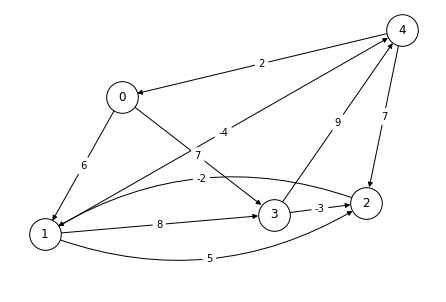

In [112]:
from termcolor import colored
from math import inf

def bellman_ford(G, s, visualize = False, verbose = False):
  size = len(G.nodes())
  distance = [0] * size # Almacena la distancia de s a cada nodo

  for n in G.nodes():
    distance[n] = inf # Inicializamos la distancia a cada nodo en infinito

  distance[s] = 0 # Inicializamos el nodo de partida con distancia cero

  if verbose:
    print(f"Inicializando nodo {colored(s, 'magenta')} con distancia 0")
    print(f"Inicializando resto de nodos con distancia infinita")

  for i in range(size - 1): # Se recorren los arcos del grafo V - 1 veces
    changed = False # Revisa si hubo cambios en la iteración actual

    if verbose:
      print(f"\nIteración {i+1}:\n")

    for e in G.edges():
      u, v = e[0], e[1]    
      d = distance[u] + G[u][v]['weight'] # Calculamos la distancia

      if verbose:
        print(f"Calculando distancia al nodo {colored(v, 'magenta')} ", end='')
        print(f"con nodo predecesor {colored(u, 'blue')}: ", end='')
        print(f"{distance[u]} + {G[u][v]['weight']} = {colored(d, 'green')}")

      if d < distance[v]: # Si la distancia es menor la actualizamos
        distance[v] = d
        changed = True

        if verbose:
          print(f"Distancia ({colored(d, 'green')}) es menor ", end='')
          print(f"a la actual ({d}). Actualizando...")

      else:
        if verbose:
          print(f"Distancia ({colored(d, 'green')}) es mayor ", end='')
          print(f"a la actual ({d})")

    # Si no hubo cambios en la última iteración, rompemos el ciclo
    if changed == False: 
      if verbose:
        print(f"\nNo hubo cambios en la última iteración. Rompiendo ciclo...\n")
      break

  if visualize: draw_graph(G)

  if changed == True:
    if verbose:
      print(f"\nIterando una última vez para detectar ciclos negativos...\n")

    # Se vuelven a recorrer los arcos para revisar si existen ciclos negativos
    for e in G.edges():
      u, v = e[0], e[1]    
      d = distance[u] + G[u][v]['weight']

      if d < distance[v]:
        if verbose: print(f"Ciclo negativo detectado.")
        return list() # Si existe un ciclo negativo retornamos una lista vacía

  if verbose: print(f"Distancias: {distance}")

  return distance

edges = [
  (0, 1,  6),
  (0, 3,  7),
  (1, 2,  5),
  (1, 3,  8),
  (1, 4, -4),
  (2, 1, -2),
  (3, 2, -3),
  (3, 4,  9),
  (4, 0,  2),
  (4, 2,  7)
]

G = create_graph(edges)
d = bellman_ford(G, 0, True)
print(f"Distancias: {d}")

### Dijkstra

In [113]:
class Node:
  def __init__(self, key, priority):
    self.key = key
    self.priority = priority

class Heap:
  def __init__(self):
    self.A = list()
    self.size = 0

  def insert(self, key, priority):
    node = Node(key, priority)

    if self.size == len(self.A): self.A.append(node)
    else: self.A[self.size] = node
    curr = self.size

    while True:  
      if curr == 0: break
      parent = (curr-1)//2

      if self.A[parent].priority > node.priority:
        curr = parent
      else: break

    self.A[self.size], self.A[curr] = self.A[curr], self.A[self.size]
    self.size += 1

  def pop(self):
    if self.size == 0: return

    node = self.A[0]
    self.A[0] = self.A[self.size-1]
    self.size -= 1
    curr = 0

    while True:
      left = curr*2+1
      right = curr*2+2
      aux = curr

      if left < self.size and self.A[left].priority < self.A[curr].priority:
        curr = left

      if right < self.size and self.A[right].priority < self.A[curr].priority:
        curr = right

      if curr == aux: break
      self.A[aux], self.A[curr] = self.A[curr], self.A[aux]

    return node

  def is_empty(self):
    if self.size == 0: return True
    return False

In [114]:
from termcolor import colored
from math import inf

def dijkstra(G, s, visualize = False):
  size = len(G.nodes())
  distance = [0] * size # Almacena la distancia de s a cada nodo
  visited = [False] * size # Almacena el estado de cada nodo (visitado = True)

  Q = Heap() # Creamos un montículo de mínimos para guardar los nodos

  for n in G.nodes():
    distance[n] = inf # Inicializamos la distancia a cada nodo en infinito

  distance[s] = 0 # Inicializamos el nodo de partida con distancia cero
  Q.insert(s, 0) # Insertamos el nodo s en el montículo

  while not Q.is_empty():
    u = Q.pop().key # Eliminamos el nodo con menor distancia del montículo
    visited[u] = True # Marcamos el nodo como visitado

    adj = G[u] # Obtenemos los nodos adyacentes

    for v in adj:

      if not visited[v]:
        d = distance[u] + G[u][v]['weight'] # Calculamos la distancia

        if d < distance[v]: # Si la distancia es menor la actualizamos
          distance[v] = d
          Q.insert(v, d) # Insertamos este nodo en el montículo

  if visualize: draw_graph(G)

  return distance

Distancias: [0, 8, 9, 5, 7]


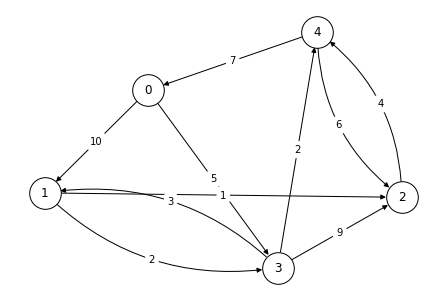

In [115]:
edges = [
  (0, 1, 10),
  (0, 3, 5),
  (1, 2, 1),
  (1, 3, 2),
  (2, 4, 4),
  (3, 1, 3),
  (3, 2, 9),
  (3, 4, 2),
  (4, 0, 7),
  (4, 2, 6)
]

G = create_graph(edges)
d = dijkstra(G, 0, True)
print(f"Distancias: {d}")

## 2.2. Descripción del algoritmo

La entrada consiste en un grafo dirigido $G$ con $n$ vértices, donde cada arco posee un peso asignado (distancia), más un nodo $s$ que corresponde al punto de partida. Si no existen ciclos negativos, el algoritmo retorna un diccionario con la distancia mínima que existe entre el nodo inicial y el resto de nodos del grafo. En caso contrario, el algoritmo retorna `False`, indicando que no fue posible calcular todas las distancias. Los pasos realizados son los siguientes:

1. Se crea un diccionario para guardar la distancia mínima de $s$ al resto de nodos, inicializando sus valores en infinito.

2. Asignamos al nodo $s$ una distancia de 0, puesto que corresponde al nodo inicial.

3. Iteramos $V-1$ veces por todos los arcos del grafo o hasta que no existan más cambios en las distancias (lo que ocurra primero).

4. Para cada arco $(u, v)$, calculamos la distancia de $s$ a $v$ como $\text{dist}(s, v) = \text{dist}(s, u) + w(u, v)$, donde $w(u, v)$ corresponde al peso del arco $(u, v)$.

5. Si la distancia calculada en el paso anterior es menor a la actual, actualizamos su valor.

6. Al finalizar las iteraciones, realizamos una última iteración adicional para verificar que no existan ciclos negativos. Si para cualquier arco $(u, v)$ obtenemos una distancia menor a las previamente calculadas, retornamos `False`.

7. Si no existen ciclos negativos, retornamos el diccionario con las distancias obtenidas.


## 2.3 Ejemplo

Consideremos el siguiente grafo:

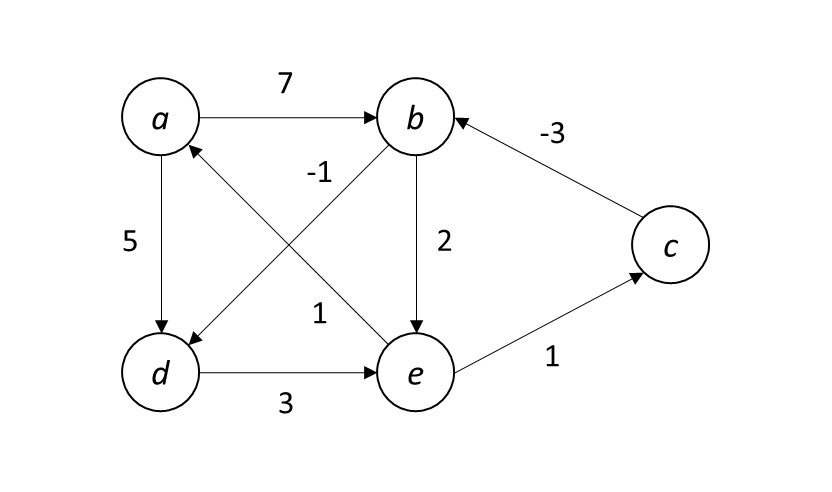

En primer lugar, inicializamos la distancia de cada vértice del grafo, considerando como punto de partida el nodo $a$:

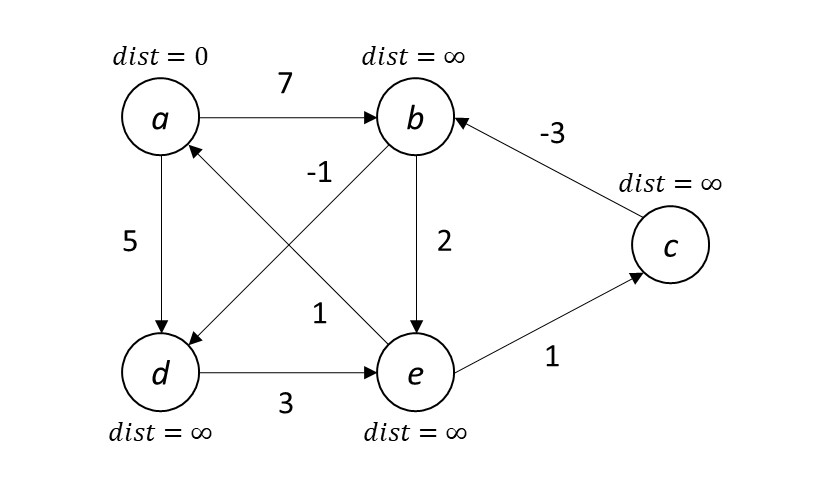

Luego, iteramos por cada uno de los arcos del grafo. Para este ejemplo, asumiremos que los arcos se recorren en orden alfabético.

Al pasar por el arco $(a, b)$, calculamos el valor de la distancia para el nodo de llegada.

$\text{dist}(a, b) = \text{dist}(a, a) + w(a, b) = 0 + 7 = 7$

Como $7 < ∞$, actualizamos el valor de la distancia. Repetimos este paso para el arco $(a, d)$

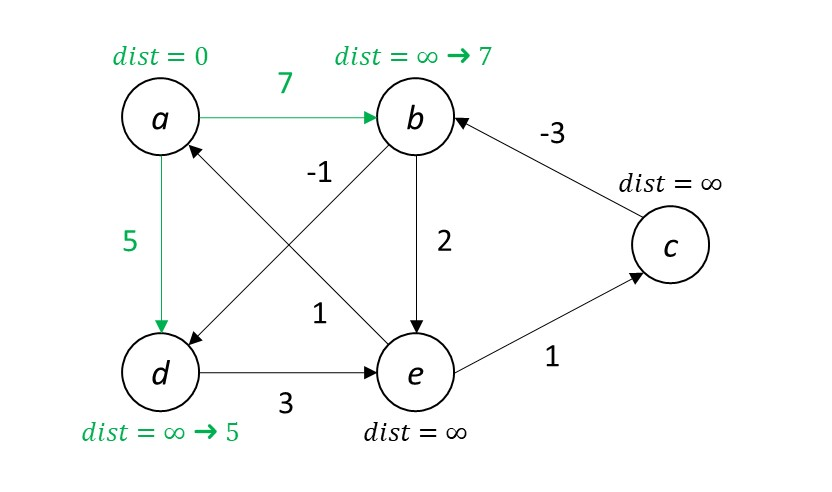

Continuamos con el arco $(b, d)$. En este caso, notamos que al calcular la distancia, obtenemos un valor mayor al previamente guardado.

$\text{dist}(b, d) = \text{dist}(a, b) + w(b, d) = 7 + (-1) = 6$

Como $5 > 6$, mantenemos el valor anterior.

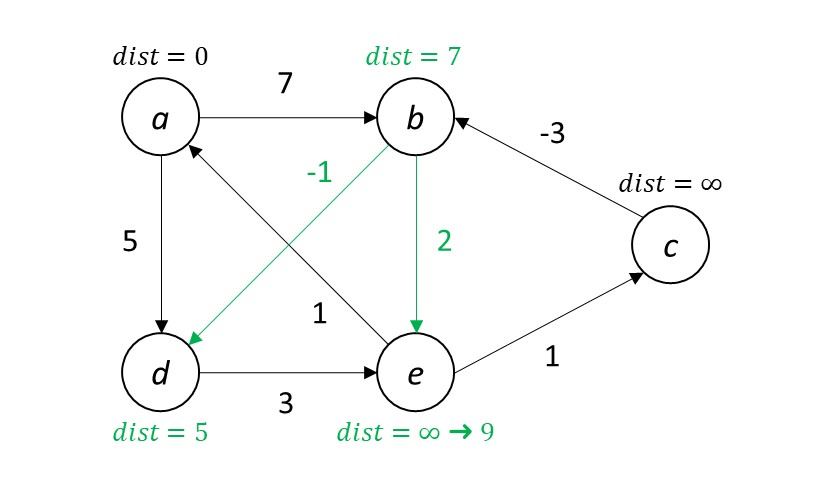

Repetimos este paso para el resto de arcos del grafo:

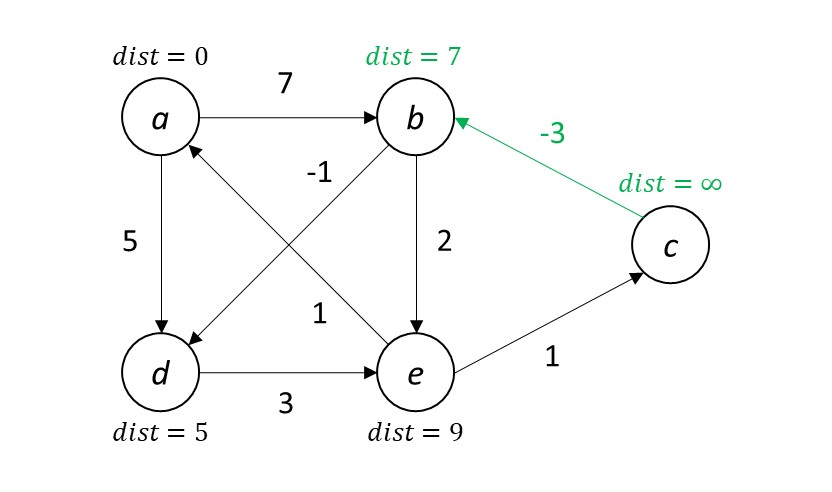

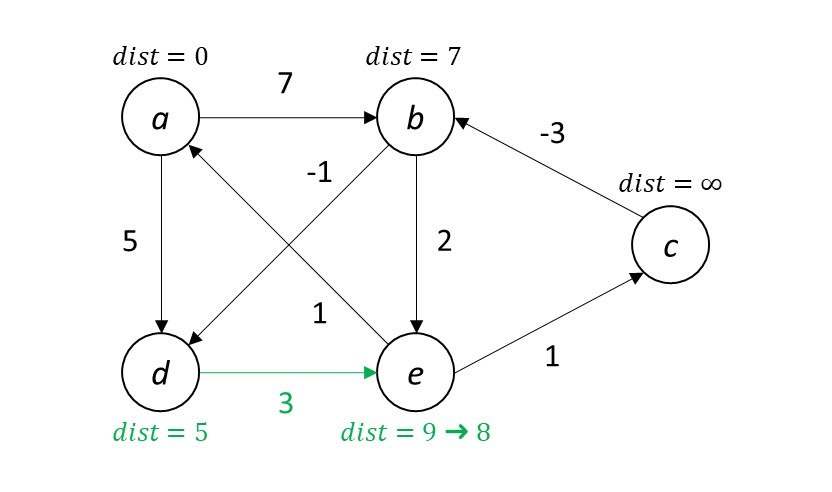

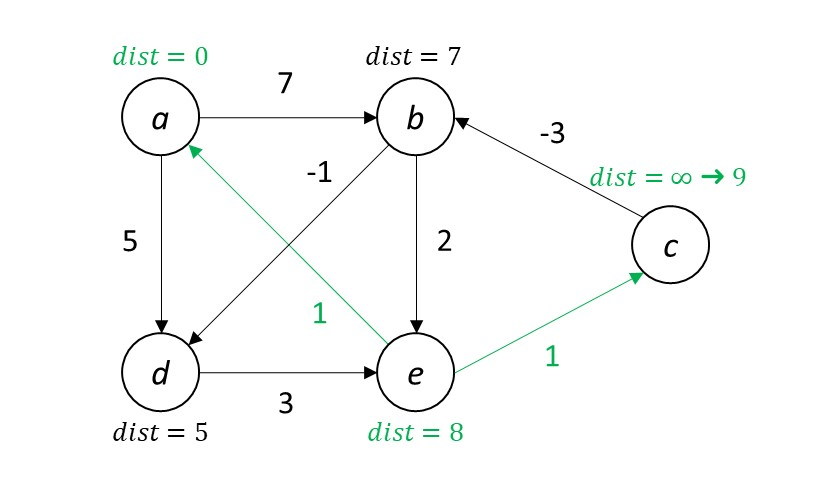

Al finalizar la primera iteración, obtenemos las siguientes distancias:

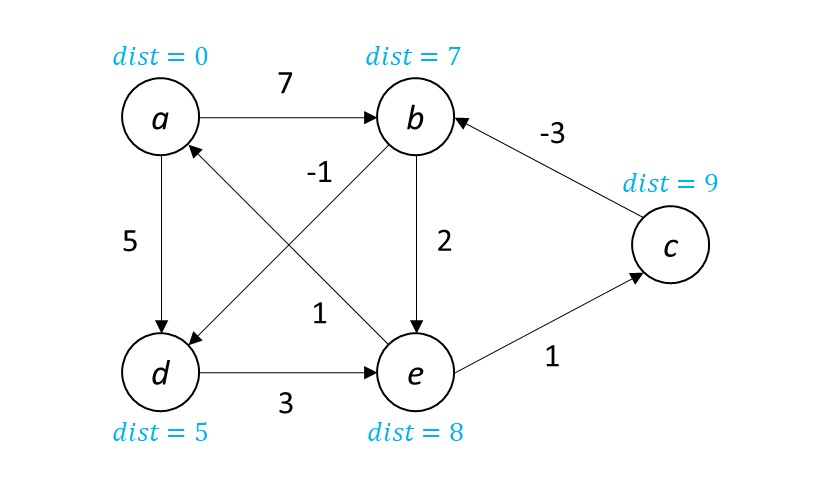

En la siguiente iteración, actualizamos los valores que sean necesarios:

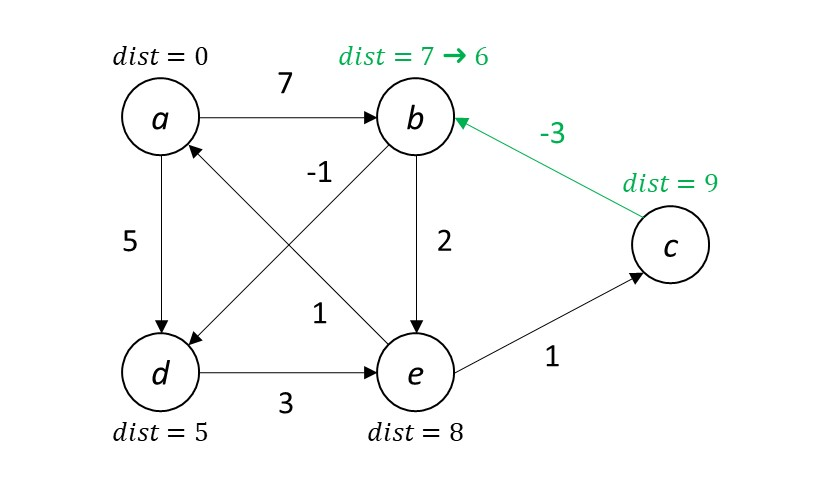

Continuamos iterando hasta completar las $n-1$ iteraciones, o convenientemente hasta que no ocurran más cambios. Finalmente, retornamos las distancias obtenidas:

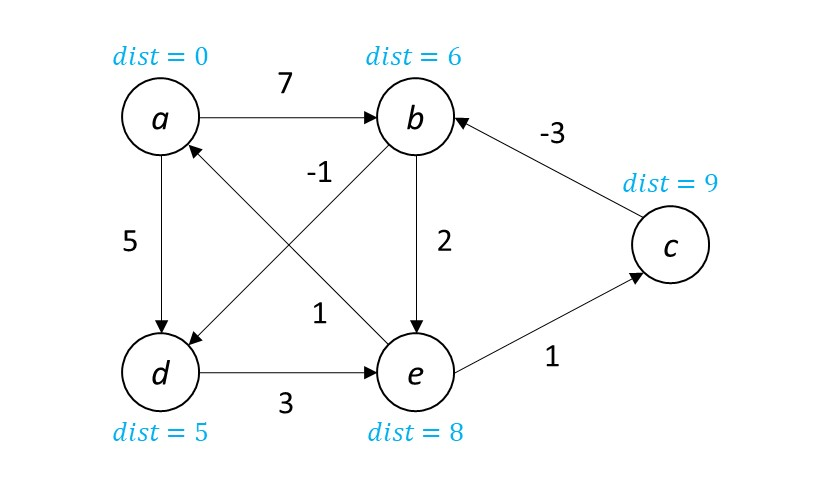

## 2.4. Ejecución del algoritmo paso a paso (`verbose=True`)

Usando la opción `verbose=True`, podemos ver lo que ocurre en cada paso del algoritmo:

In [116]:
import networkx as nx
import string
import random

def graph_instance_creator(n, negative_weights):
  graph = nx.gnp_random_graph(n, 0.45, 1, True)
  weighted_edges = list()

  if negative_weights: min, max = -3, 9
  else: min, max = 1, 9

  for e in graph.edges():
    weight = random.randint(min, max)
    weighted_edges.append((e[0], e[1], weight))

  return create_graph(weighted_edges)

Inicializando nodo 0 con distancia 0
Inicializando resto de nodos con distancia infinita

Iteración 1:

Calculando distancia al nodo 1 con nodo predecesor 0: 0 + 1 = 1
Distancia (1) es menor a la actual (1). Actualizando...
Calculando distancia al nodo 4 con nodo predecesor 0: 0 + 9 = 9
Distancia (9) es menor a la actual (9). Actualizando...
Calculando distancia al nodo 2 con nodo predecesor 1: 1 + 9 = 10
Distancia (10) es menor a la actual (10). Actualizando...
Calculando distancia al nodo 0 con nodo predecesor 4: 9 + -1 = 8
Distancia (8) es mayor a la actual (8)
Calculando distancia al nodo 3 con nodo predecesor 4: 9 + -2 = 7
Distancia (7) es menor a la actual (7). Actualizando...
Calculando distancia al nodo 0 con nodo predecesor 2: 10 + 2 = 12
Distancia (12) es mayor a la actual (12)
Calculando distancia al nodo 1 con nodo predecesor 2: 10 + 5 = 15
Distancia (15) es mayor a la actual (15)
Calculando distancia al nodo 4 con nodo predecesor 2: 10 + 7 = 17
Distancia (17) es mayor a la

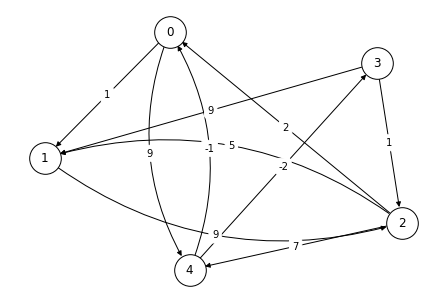

In [117]:
graph = graph_instance_creator(5, True)
d = bellman_ford(graph, 0, True, True)

# 3. Correctitud

### **Teorema 1: Correctitud del algoritmo Bellman-Ford**

*El algoritmo **Bellman-Ford** calcula correctamente la distancia de un nodo inicial $s$ al resto de nodos de un grafo $G$ sin ciclos negativos.*

## Prueba del Teorema

### Hipótesis inductiva

*En la $k$-ésima iteración del algoritmo, la distancia de $s$ a cada nodo $v$ es igual a la distancia del camino más corto pasando como máximo por $k$ arcos.*

### Prueba por inducción

**Caso base**

Para $k = 0$, el valor de la distancia para el nodo $s$ es 0, mientras que la distancia al resto de nodos es $∞$. Esto es correcto, pues este caso implica pasar como máximo por 0 arcos. Como no es posible llegar al resto de vértices, decimos que la distancia es $∞$.

**Paso inductivo**

Al comienzo de la iteración $k+1$, por inducción sabemos que la distancia actual de $s$ a $v$ corresponde a la distancia del camino más corto a este nodo pasando como máximo por $k$ arcos. Sin embargo, si consideramos un arco adicional, podría existir un camino que optimice esta distancia. 

Consideremos un nodo $u$ predecesor de $v$ tal que $s \leadsto u$ está formado por $k$ arcos. Al agregar el arco $(u, v)$ a este camino, se forma un nuevo camino $s \leadsto v$ con $k+1$ arcos. Por inducción, sabemos que la distancia calculada para cada nodo $u$ es óptima. Luego, al sumar el peso del arco $(u, v)$ obtendremos la distancia de $s \leadsto v$ pasando por el nodo $u$. Teniendo esto en cuenta, existen dos casos:

1. El camino más corto $s \leadsto v$ está formado por $k$ arcos o menos. En este caso, $v$ se mantiene con el valor obtenido en la iteración anterior.

2. El camino más corto $s \leadsto v$ está formado por $k$ arcos, más un arco $(u, v)$. En este caso, sabemos que un arco $(u, v)$ será el que minimice la distancia $s \leadsto v$. Al finalizar la iteración, se habrá calculado un nuevo valor óptimo para $\text{dist}(s, v)$.

### Corolario

*La cantidad mínima de iteraciones necesarias para encontrar la distancia óptima a cada vértice es $V-1$*

En el peor caso, para cualquier nodo $v$ del grafo, el camino más corto $s \leadsto v$ estará formado como máximo por $V-1$ arcos, si y solo si no existen ciclos negativos. Esto se puede visualizar fácilmente en la siguiente imagen:

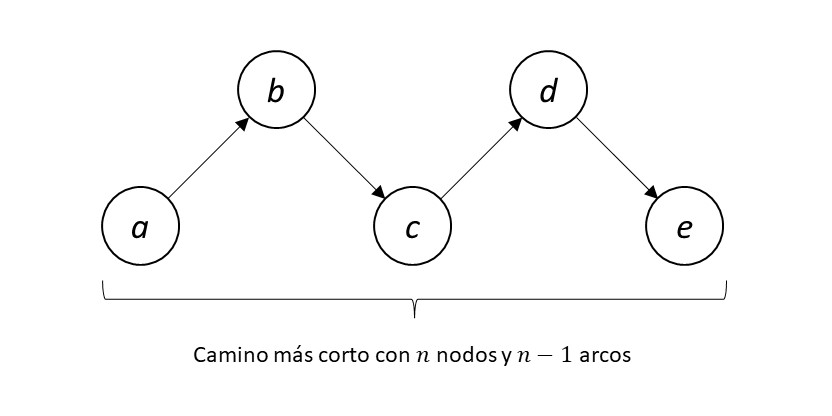

Como en cada iteración se encuentra el camino más corto para cada vértice pasando como máximo por $k$ arcos, en la iteración $V - 1$ se encontrará la distancia a todos los vértices separados por esta cantidad de arcos.

Observemos que el algoritmo realiza una última iteración para verificar la existencia de ciclos negativos. Hasta este paso, habremos calculado la distancia mínima a cada nodo del grafo, por lo cual si obtenemos un valor menor durante esta iteración, implica la existencia de al menos un ciclo negativo. 

Habiendo demostrado la hipótesis y el corolario planteado, queda demostrada la correctitud del algoritmo **Bellman-Ford**. $\Box$

# 4. Tiempo de ejecución

### **Teorema 2: Tiempo de ejecución del algoritmo Bellman-Ford**

*El algoritmo **Bellman-Ford** tiene un un tiempo de ejecución $O(V \cdot E)$ en el caso promedio, $O(E)$ en el mejor caso y $O(V^3)$ en el peor caso.*

### Caso promedio

Podemos obtener fácilmente la complejidad temporal promedio analizando cada operación realizada por el algoritmo:

1. Inicializar la distancia para cada nodo del grafo tiene un tiempo de ejecución $O(V)$

2. Realizar $V - 1$ iteraciones pasando por todos los arcos del grafo tiene un tiempo de ejecución $O(V \cdot E)$

3. Realizar una iteración adicional por todos los arcos para verificar la existencia de ciclos negativos tiene un tiempo de ejecución $O(E)$

Luego, la complejidad temporal del algoritmo es $O(V) + O(V \cdot E) + O(E) = O(V \cdot E)$

### Mejor caso

El mejor caso ocurrirá cuando un grafo se recorra de izquierda a derecha, de manera que la distancia a cada nodo predecesor $u$ siempre se calculará correctamente, y podremos calcular de inmediato la distancia óptima a un nodo $v$.

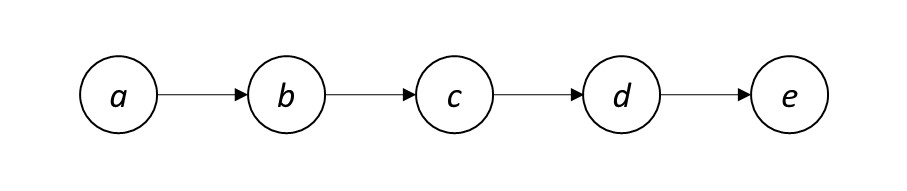

En este caso, solo se necesitarán 2 iteraciones por los arcos del grafo: una para calcular los valores óptimos, y otra para verificar que no ocurran más cambios en las distancias. Por lo tanto, la complejidad temporal de este caso es $O(E)$.

### Peor caso

El peor caso ocurrirá cuando el grafo de entrada contenga un número de arcos con complejidad cuadrática. Un ejemplo de esto son los **grafos completos**, en donde cada par de vértices está conectado por una arista.

La cantidad de conexiones para un grafo completo se calcula como $V(V-1)/2$

<br>
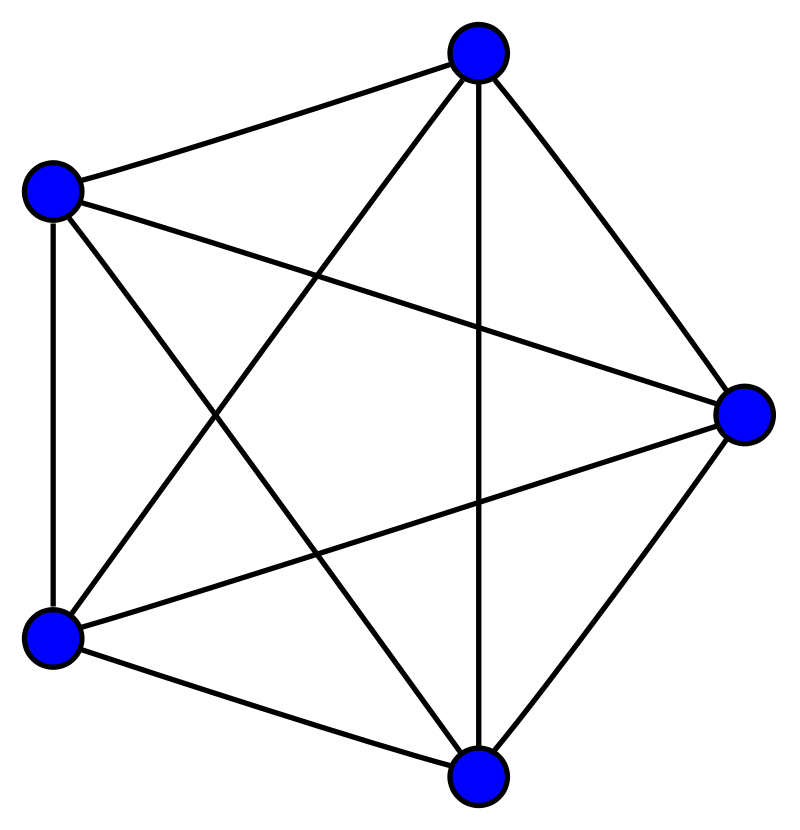
<br>

Además, si el grafo contiene ciclos negativos, la cantidad de iteraciones será $V - 1$. Por lo tanto, la complejidad temporal de este caso es $O(V) \cdot O(V^2) = O(V^3)$


# 5. Experimentos

## 5.1 Experimento 1

### Análisis de resultados

## 5.2 Experimento 2

### Análisis de resultados